
<center><h1>Mens T20 Cricket World Cup Analysis</h1></center>
<center><h3>-By Pranjal Jais</h3></center>
<center><span style="font-size: 20px;"><a href="https://www.kaggle.com/datasets/pardeep19singh/icc-mens-t20-world-cup-2024?select=deliveries.csv" style="text-decoration: none; color: blue;">Dataset Link</a></span></center>

<center><h2 id = "sec1" >Importing Required Libraries and Dataset</h2></center>
<a id = 'sec1'></a>

In [44]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
df = pd.read_csv(r"C:\Users\HP\Desktop\My Folder\Machine Learning Models\Datasets\deliveries.csv")


<center><h2 id = 'sec2'>Overview of Data (deliveries.csv)</h2></center>

In [46]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.shape

(11472, 22)

In [48]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11472 entries, 0 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                11472 non-null  int64  
 1   season                  11472 non-null  int64  
 2   start_date              11472 non-null  object 
 3   venue                   11472 non-null  object 
 4   innings                 11472 non-null  int64  
 5   ball                    11472 non-null  float64
 6   batting_team            11472 non-null  object 
 7   bowling_team            11472 non-null  object 
 8   striker                 11472 non-null  object 
 9   non_striker             11472 non-null  object 
 10  bowler                  11472 non-null  object 
 11  runs_off_bat            11472 non-null  int64  
 12  extras                  11472 non-null  int64  
 13  wides                   408 non-null    float64
 14  noballs                 45 non-null   

<center><h2 id = 'sec3'>Analysis and Obsevations by Graphs</h2></center>

<center><h2 id = 'sec3.1'>Batting Record and Stats</h2></center>

<center><h3 id = 'sec3.1.1'>1. Highest Run scorer in Season</h3></center>

In [50]:
top_run_scorer = df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).reset_index()
top_run_scorer.head(10)

,striker,runs_off_bat
0,Rahmanullah Gurbaz,281
1,RG Sharma,257
2,TM Head,255
3,Q de Kock,243
4,Ibrahim Zadran,231
5,N Pooran,228
6,AGS Gous,219
7,JC Buttler,214
8,SA Yadav,199
9,H Klaasen,190


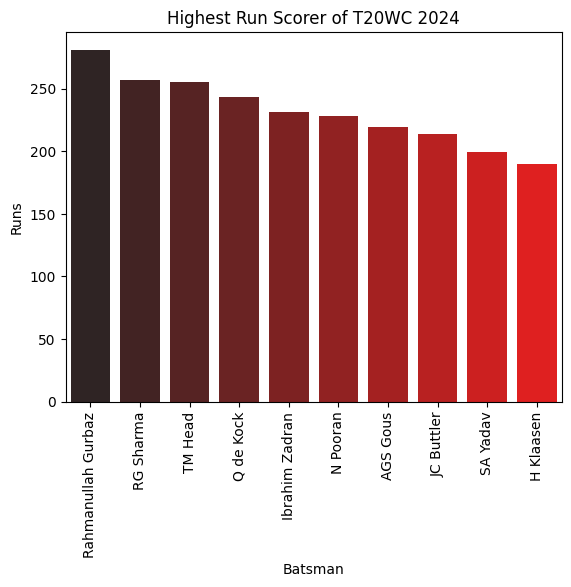

In [51]:
plt.title('Highest Run Scorer of T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Runs')
plt.xlabel('Batsman')
sns.barplot(data=top_run_scorer[:10], x = 'striker', y = 'runs_off_bat',hue = 'striker',palette='dark:red')
plt.show()

**OBSERVATIONS**
- Highest run scored by Player in T20WC 2024 is 281 by **Rahmanullah Gurbaz**.
- **Rohit Sharma** is on second spot with 257 runs
- And **Travis Head** is on third spot with 255 runs
---

 
<center><h3 id = 'sec3.1.2'>2. Highest Individual Score by a player</h3></center>

In [52]:
highest_individual_score = df.groupby(['match_id', 'striker'])['runs_off_bat'].sum().sort_values(ascending=False)
highest_individual_score.head()
highest_individual_score = highest_individual_score.reset_index()
highest_individual_score.head(10)

,match_id,striker,runs_off_bat
0,39,N Pooran,98
1,0,Aaron Jones,94
2,50,RG Sharma,92
3,41,PD Salt,87
4,48,JC Buttler,83
5,45,SD Hope,82
6,40,AGS Gous,80
7,13,Rahmanullah Gurbaz,80
8,50,TM Head,76
9,4,Rahmanullah Gurbaz,76


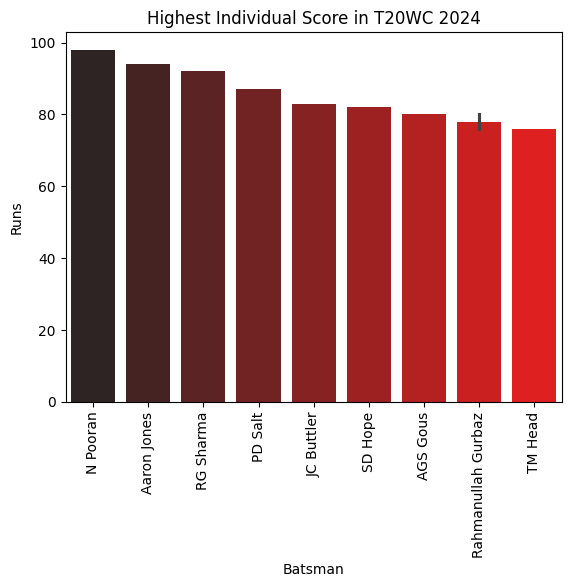

In [53]:
plt.title('Highest Individual Score in T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Runs')
plt.xlabel('Batsman')
sns.barplot(x = highest_individual_score['striker'].head(10), y = highest_individual_score['runs_off_bat'].head(10), hue=highest_individual_score['striker'].head(10) ,palette='dark:red')
plt.show()

**OBSERVATIONS**
- Highest Individual Runs came from the bat of **Nicolas Pooran** with 98 runs.
- **Aaron James** is on second spot with 94 runs in his Debut match. 
- And **Rohit Sharma** is on third spot with 92 runs.
---

### 
<center><h3 id = 'sec3.1.3'>3. Most Sixes By Player in T20WC 2024</h3></center>

In [54]:
sixes_df = df[df['runs_off_bat'] == 6]
fours_df = df[df['runs_off_bat'] == 4]

In [55]:
most_sixes_by_striker = sixes_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).reset_index()
most_sixes_by_striker.head(10)

,striker,runs_off_bat
0,N Pooran,17
1,Rahmanullah Gurbaz,16
2,RG Sharma,15
3,TM Head,15
4,Aaron Jones,14
5,H Klaasen,13
6,Q de Kock,13
7,AGS Gous,11
8,MP Stoinis,10
9,PD Salt,10


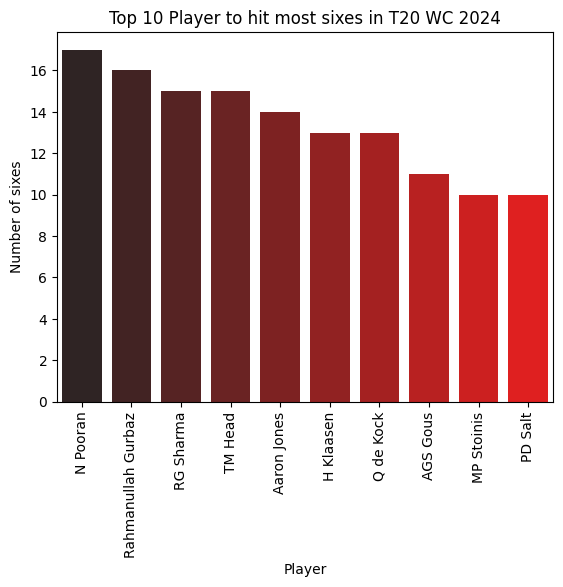

In [56]:
plt.title('Top 10 Player to hit most sixes in T20 WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Number of sixes')
plt.xlabel('Player')
sns.barplot(x = most_sixes_by_striker['striker'].head(10), y =  most_sixes_by_striker['runs_off_bat'].head(10), palette='dark:red', hue = most_sixes_by_striker['striker'].head(10))
plt.show()

**OBSERVATIONS**
- **Nicolas Pooran** holds the record of hitting 17 sixes in T20WC 2024.
- **Rahmanullah Gurbaz** is on second spot with 16 sixes
- And **Rohit Sharma** is on third spot with 15 sixes
---


<center><h3 id = 'sec3.1.4'>4. Most Sixes By Player in Single Inning in T20WC 202</h3></center>

In [57]:
most_sixes_by_striker_in_single_inning =  sixes_df.groupby(['match_id', 'striker'])['runs_off_bat'].count().sort_values(ascending=False)
most_sixes_by_striker_in_single_inning = most_sixes_by_striker_in_single_inning.reset_index()
most_sixes_by_striker_in_single_inning.head(10)

,match_id,striker,runs_off_bat
0,0,Aaron Jones,10
1,45,SD Hope,8
2,50,RG Sharma,8
3,39,N Pooran,8
4,48,JC Buttler,7
5,34,BJ McMullen,6
6,9,MP Stoinis,6
7,25,SE Rutherford,6
8,54,H Klaasen,5
9,41,PD Salt,5


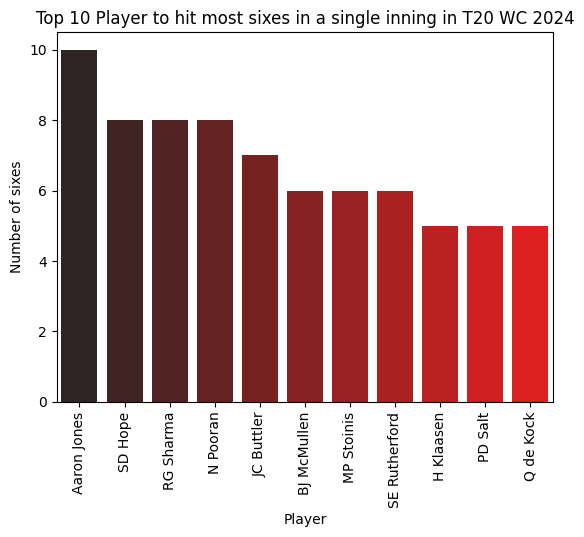

In [58]:
plt.title('Top 10 Player to hit most sixes in a single inning in T20 WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Number of sixes')
plt.xlabel('Player')
sns.barplot(x = most_sixes_by_striker_in_single_inning['striker'][:11], y = most_sixes_by_striker_in_single_inning['runs_off_bat'][:11], palette='dark:red', hue = most_sixes_by_striker_in_single_inning['striker'][:11])
plt.show()

**OBSERVATIONS**
- **Aaron James** holds the record of hitting 10 sixes in single inning in T20WC 2024.
- **SD Hopes**, **Rohit Sharma** & **Nicolas Pooran** are on second spot with 8 sixes.
- And **Josh Buttler** is on third spot with 7 sixes.
---


<center><h3 id = 'sec3.1.5'>5. Most Fours By a Player in T20WC 2024</h3></center>

In [59]:
most_fours_by_striker = fours_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).reset_index()
most_fours_by_striker.head(10)

,striker,runs_off_bat
0,TM Head,26
1,Ibrahim Zadran,25
2,RG Sharma,24
3,JC Buttler,22
4,Q de Kock,21
5,AGS Gous,20
6,RR Pant,19
7,Rahmanullah Gurbaz,18
8,J Charles,18
9,DA Warner,17


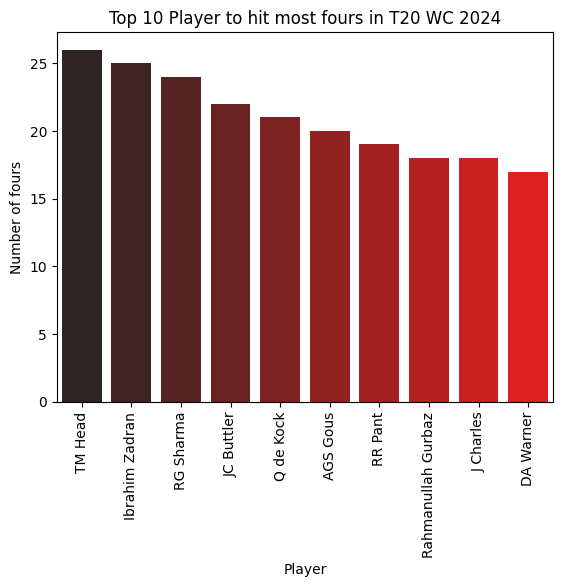

In [60]:
plt.title('Top 10 Player to hit most fours in T20 WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Number of fours')
plt.xlabel('Player')
sns.barplot(x = most_fours_by_striker['striker'].head(10), y =  most_fours_by_striker['runs_off_bat'].head(10), palette='dark:red', hue = most_fours_by_striker['striker'].head(10))
plt.show()

**OBSERVATIONS**
- **Travis Head** holds the record of hitting 26 fours in T20WC 2024.
- **Ibrahim Zadran** is on second spot with 25 fours
- And **Rohit Sharma** is on third spot with 24 fours
---


<center><h3 id = 'sec3.1.6'>6. Most Fours in a single inning in T20WC 2024</h3></center>

In [61]:
most_fours_by_striker_in_single_inning =  fours_df.groupby(['match_id', 'striker'])['runs_off_bat'].count().sort_values(ascending=False)
most_fours_by_striker_in_single_inning = most_fours_by_striker_in_single_inning.reset_index()
most_fours_by_striker_in_single_inning.head(10)

,match_id,striker,runs_off_bat
0,34,MP Stoinis,9
1,26,Shakib Al Hasan,9
2,50,TM Head,9
3,4,Ibrahim Zadran,9
4,19,BJ McMullen,9
5,39,J Charles,8
6,1,BA King,7
7,0,AGS Gous,7
8,14,P Nissanka,7
9,41,PD Salt,7


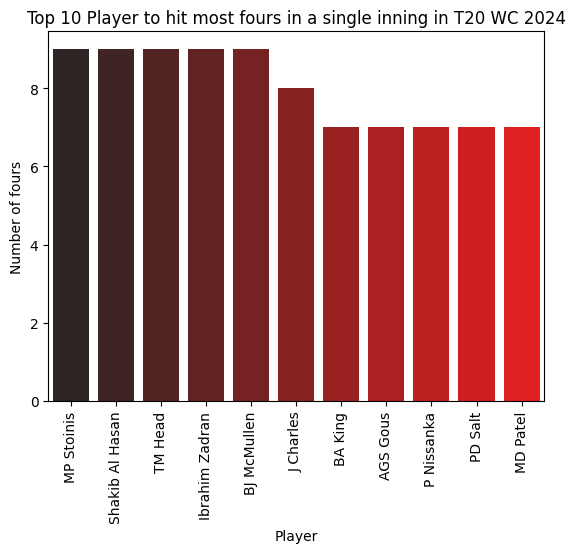

In [62]:
plt.title('Top 10 Player to hit most fours in a single inning in T20 WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Number of fours')
plt.xlabel('Player')
sns.barplot(x = most_fours_by_striker_in_single_inning['striker'][:11], y = most_fours_by_striker_in_single_inning['runs_off_bat'][:11], palette='dark:red', hue = most_fours_by_striker_in_single_inning['striker'][:11])
plt.show()

**OBSERVATIONS**
- **Marcus Stoinis**, **Shakib Al Hasan**, **Travis Head**, **Ibrahim Zadran** and **BJ McMullen** hold the record of hitting 9 fours in single inning.
- **J Charles** is on second spot with 8 fours.
- And **BA King**, **AGS Gous**, **P Nissanka** and **Phil Salt** are on third spot with 7 fours.
---


<center><h2 id = 'sec3.2.1'>Bowling Record and Stats</h2></center>

### 
<center><h3 id = 'sec3.2.1'>1. Highest Wicket Taker in T20WC 2024</h3></center>

In [63]:
bowlers_column = ['start_date', 'match_id', 'venue','bowler' ,'runs_off_bat', 'extras', 'wides','noballs', 'wicket_type']
bowler_df = df[bowlers_column]
bowler_df.fillna(np.nan)
total_runs_given = bowler_df['runs_off_bat'] + bowler_df['extras']
bowler_df['total_runs_given'] = total_runs_given

C:\Users\HP\AppData\Local\Temp\ipykernel_5176\26937061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowler_df['total_runs_given'] = total_runs_given


In [64]:
most_wickets = bowler_df.groupby(['bowler'])['wicket_type'].count().sort_values(ascending=False).reset_index()
most_wickets.head(10)

,bowler,wicket_type
0,Arshdeep Singh,18
1,Fazalhaq Farooqi,17
2,Naveen-ul-Haq,16
3,A Nortje,16
4,JJ Bumrah,15
5,K Rabada,15
6,AS Joseph,14
7,Rashid Khan,14
8,Rishad Hossain,14
9,A Zampa,13


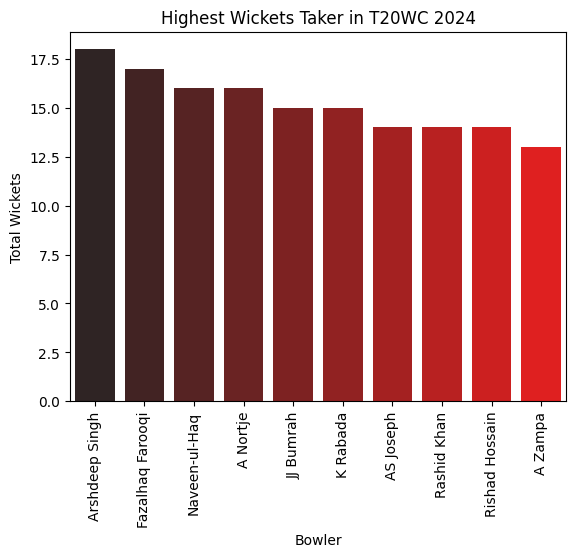

In [65]:
plt.title('Highest Wickets Taker in T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Total Wickets')
plt.xlabel('Bowler')
sns.barplot(x = most_wickets['bowler'].head(10), y = most_wickets['wicket_type'].head(10), palette='dark:red', hue = most_wickets['bowler'].head(10))
plt.show()

**OBSERVATIONS**
- **Arshdeep Singh** is the highest wicket taker of T20WC 2024 with 18 wickets.
- **Fazalhaq Farooqi** is on second spot with 17 wickets
- And **A Nortje** and **Naveen-ul-Haq** are on third spot with 16 wickets
---

<center><h3 id = 'sec3.2.2'>2. Most Wickets in Single Inning in T20WC 2024</h3></center>

In [66]:
most_wickets_in_inning = df.groupby(['match_id', 'bowler'])['wicket_type'].count().sort_values(ascending=False).reset_index()
most_wickets_in_inning = most_wickets_in_inning.sort_values(by=['wicket_type', 'bowler'], ascending=[False, True])
most_wickets_in_inning.head(10)

,match_id,bowler,wicket_type
1,17,AJ Hosein,5
0,4,Fazalhaq Farooqi,5
6,3,A Nortje,4
15,23,A Zampa,4
9,45,AD Russell,4
22,53,AR Patel,4
13,25,AS Joseph,4
12,27,AU Rashid,4
14,24,Arshdeep Singh,4
19,11,BTJ Wheal,4


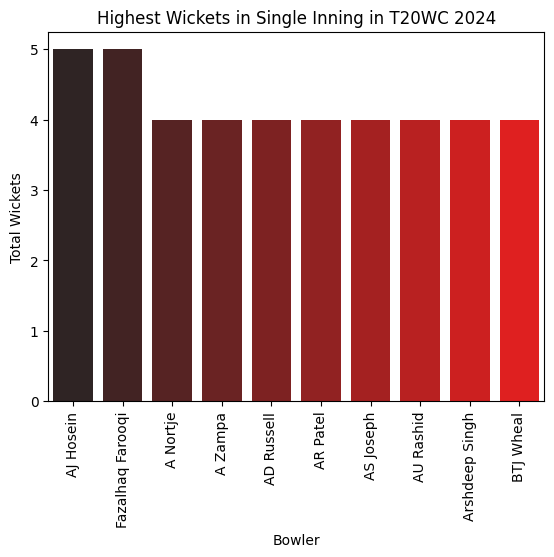

In [67]:
plt.title('Highest Wickets in Single Inning in T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Total Wickets')
plt.xlabel('Bowler')
sns.barplot(x = most_wickets_in_inning['bowler'].head(10), y = most_wickets_in_inning['wicket_type'].head(10), hue = most_wickets_in_inning['bowler'].head(10), palette='dark:red')
plt.show()

**OBSERVATIONS**
- **AJ Hosein** and **Fazalhaq Farooqi** hold the record of taking 5 wickets in single inning in T20WC 2024.
---

## 
<center><h2 id = 'sec3.3'>Venue Analysis and Stats</h2></center>

### 
<center><h3 id = 'sec3.3.1'>1. Most Number of Sixes at a Stadium in T20WC 2024</h3></center>

In [68]:
sixes_at_venue = sixes_df.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False).reset_index()
sixes_at_venue.head()

,venue,runs_off_bat
0,"Kensington Oval, Bridgetown, Barbados",110
1,"Daren Sammy National Cricket Stadium, Gros Isl...",103
2,"Sir Vivian Richards Stadium, North Sound, Antigua",99
3,"Nassau County International Cricket Stadium, N...",55
4,"Grand Prairie Stadium, Dallas",46


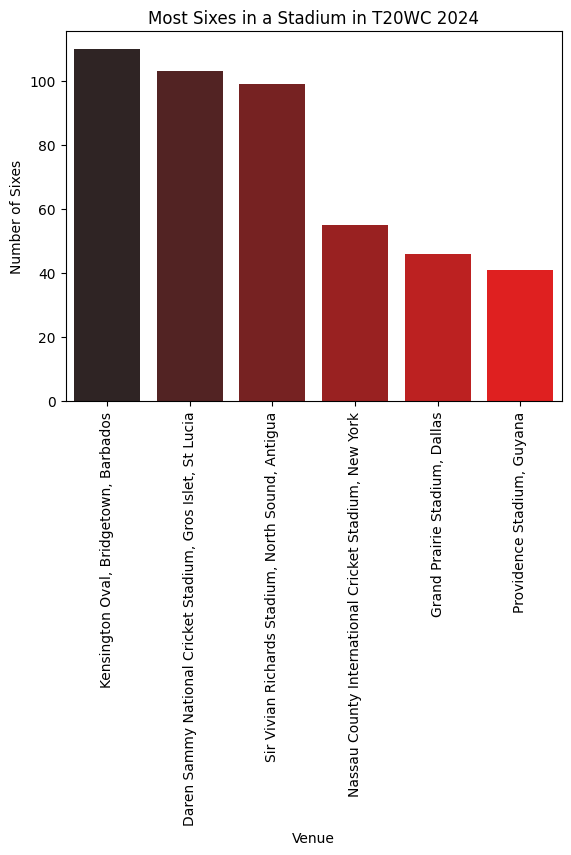

In [69]:
plt.title('Most Sixes in a Stadium in T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Number of Sixes')
plt.xlabel('Venue')
sns.barplot(x = sixes_at_venue['venue'].head(6), y = sixes_at_venue['runs_off_bat'].head(6), hue = sixes_at_venue['venue'].head(6), palette='dark:red')
plt.show()

**OBSERVATIONS**
- At **Kensington Oval, Bridgetown, Barbados** 110 sixes were hit which is highest.
- At **Daren Sammy National Cricket Stadium, Gros Islet, St Lucia** 103 sixes were hit
---

### 
<center><h3 id = 'sec3.3.2'>2. Most Number of Fours at a Stadium in T20WC 2024</h3></center>

In [70]:
fours_at_venue = fours_df.groupby('venue')['runs_off_bat'].count().sort_values(ascending=False).reset_index()
fours_at_venue.head()

,venue,runs_off_bat
0,"Kensington Oval, Bridgetown, Barbados",178
1,"Sir Vivian Richards Stadium, North Sound, Antigua",154
2,"Daren Sammy National Cricket Stadium, Gros Isl...",151
3,"Arnos Vale Ground, Kingstown, St Vincent",106
4,"Providence Stadium, Guyana",103


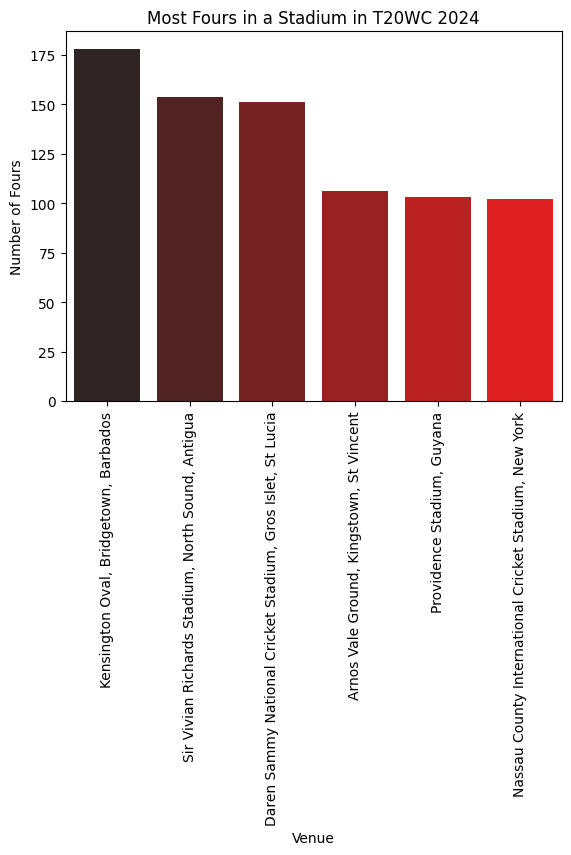

In [71]:
plt.title('Most Fours in a Stadium in T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Number of Fours')
plt.xlabel('Venue')
sns.barplot(x = fours_at_venue['venue'].head(6), y = fours_at_venue['runs_off_bat'].head(6), hue = fours_at_venue['venue'].head(6), palette='dark:red')
plt.show()

**OBSERVATIONS**
- At **Kensington Oval, Bridgetown, Barbados**, 178 fours were hit which is highest.
- At **Sir Vivian Richards Stadium, North Sound, Antigua**, 154 fours were hit
---

### 
<center><h3 id = 'sec3.3.3'>3. Highest Total Runs at a Stadium in T20WC 2024</h3></center>

In [72]:
total_runs_in_venue = df.groupby(['venue'])[['runs_off_bat', 'extras']].sum().sort_values(by = ['runs_off_bat', 'extras'], ascending=[False, False]).reset_index()
total_runs = total_runs_in_venue['runs_off_bat'] + total_runs_in_venue['extras']
total_runs_in_venue['total_runs'] = total_runs
total_runs_in_venue.head(10)

,venue,runs_off_bat,extras,total_runs
0,"Kensington Oval, Bridgetown, Barbados",2311,145,2456
1,"Daren Sammy National Cricket Stadium, Gros Isl...",1976,107,2083
2,"Sir Vivian Richards Stadium, North Sound, Antigua",1862,101,1963
3,"Nassau County International Cricket Stadium, N...",1579,130,1709
4,"Providence Stadium, Guyana",1292,97,1389
5,"Grand Prairie Stadium, Dallas",1115,89,1204
6,"Arnos Vale Ground, Kingstown, St Vincent",1107,101,1208
7,"Brian Lara Stadium, Tarouba, Trinidad",743,92,835
8,Central Broward Regional Park Stadium Turf Gro...,203,14,217


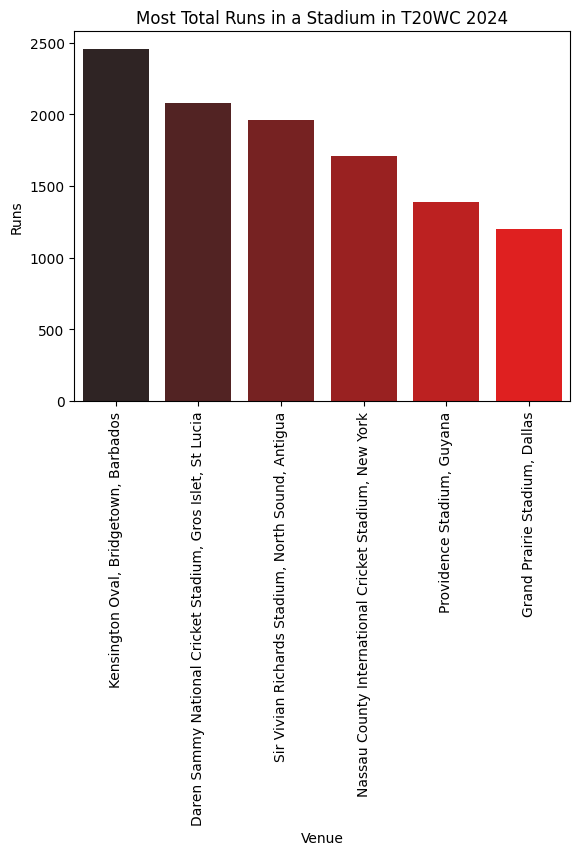

In [73]:
plt.title('Most Total Runs in a Stadium in T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Runs')
plt.xlabel('Venue')
sns.barplot(x = total_runs_in_venue['venue'].head(6), y = total_runs_in_venue['total_runs'].head(6), hue = total_runs_in_venue['venue'].head(6), palette='dark:red')
plt.show()

**OBSERVATIONS**
- **Kensington Oval, Bridgetown, Barbados** has total 2456 runs which is highest in T20WC 2024.
- **Daren Sammy National Cricket Stadium, Gros Islet, St Lucia** has total 2083 runs.
---

## 
<center><h2 id = 'sec3.4'>Team Analysis and Stats</h2></center>

### 
<center><h3 id = 'sec3.4.1'>1. Teams Played in T20WC 2024</h3></center>

In [74]:
teams = df['batting_team'].unique()
teams = pd.DataFrame(teams)
teams.rename(columns={0:'Team'}, inplace=True)
teams.head()
print('Teams Playing in T20 2024')
for i in range(len(teams)):
    print(str(i+1) + '.', teams['Team'].str.upper()[i])

Teams Playing in T20 2024
1. PAPUA NEW GUINEA
2. WEST INDIES
3. CANADA
4. UNITED STATES OF AMERICA
5. OMAN
6. NAMIBIA
7. SRI LANKA
8. SOUTH AFRICA
9. AFGHANISTAN
10. UGANDA
11. SCOTLAND
12. NEPAL
13. NETHERLANDS
14. IRELAND
15. INDIA
16. AUSTRALIA
17. PAKISTAN
18. NEW ZEALAND
19. BANGLADESH
20. ENGLAND


### 
<center><h3 id = 'sec3.4.2'>2. Total Runs by a Team in T20WC 2024</h3></center>

In [75]:
total_team_score = df.groupby('batting_team')[['runs_off_bat', 'extras']].sum().sort_values(by = ['runs_off_bat', 'extras'], ascending=[False, False]).reset_index()
total_runs = total_team_score['runs_off_bat'] + total_team_score['extras']
total_team_score['total_runs'] = total_runs
total_team_score.head(10)
total_team_score.head(10)

,batting_team,runs_off_bat,extras,total_runs
0,India,1201,55,1256
1,South Africa,1058,66,1124
2,West Indies,1056,66,1122
3,Australia,981,52,1033
4,Afghanistan,922,88,1010
5,England,856,38,894
6,United States of America,840,63,903
7,Bangladesh,819,71,890
8,Scotland,544,36,580
9,Pakistan,467,36,503


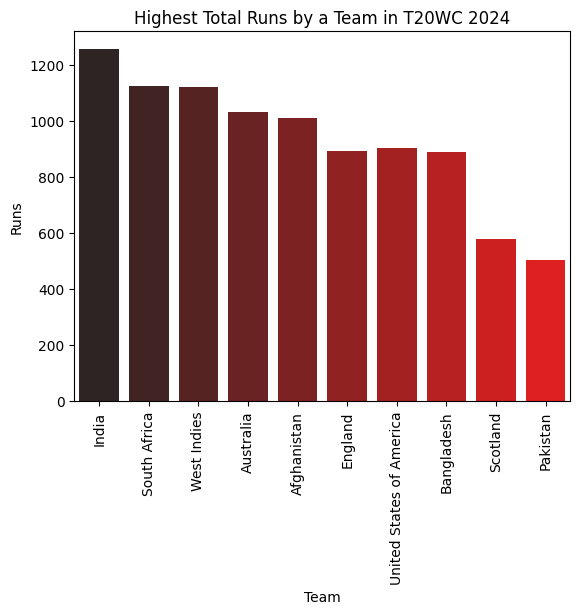

In [76]:
plt.title('Highest Total Runs by a Team in T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Runs')
plt.xlabel('Team')
sns.barplot(x = total_team_score['batting_team'].head(10), y = total_team_score['total_runs'].head(10), hue = total_team_score['batting_team'].head(10), palette='dark:red')
plt.show()

**OBSERVATIONS**
- **India** has total 1256 runs in T20WC 2024 which is highest.
- On the second spot there is **South Africa** with 1124 runs.
- And on the third spot there is **West Indies** with 1122 runs.
---

### 
<center><h3 id = 'sec3.4.3'>3. Highest Total by Team in T20WC 2024</h3></center>

In [77]:
highest_total_by_team = df.groupby(['match_id', 'batting_team'])[['runs_off_bat', 'extras']].sum().sort_values(by = ['runs_off_bat', 'extras'], ascending=[False, False]).reset_index()
total_runs = highest_total_by_team['runs_off_bat'] + highest_total_by_team['extras']
highest_total_by_team['total_runs'] = total_runs
highest_total_by_team.head(10)

,match_id,batting_team,runs_off_bat,extras,total_runs
0,39,West Indies,203,15,218
1,50,India,202,3,205
2,16,Australia,194,7,201
3,37,Sri Lanka,193,8,201
4,46,India,189,7,196
5,40,South Africa,187,7,194
6,0,Canada,184,10,194
7,0,United States of America,178,19,197
8,34,Australia,175,11,186
9,4,Afghanistan,173,10,183


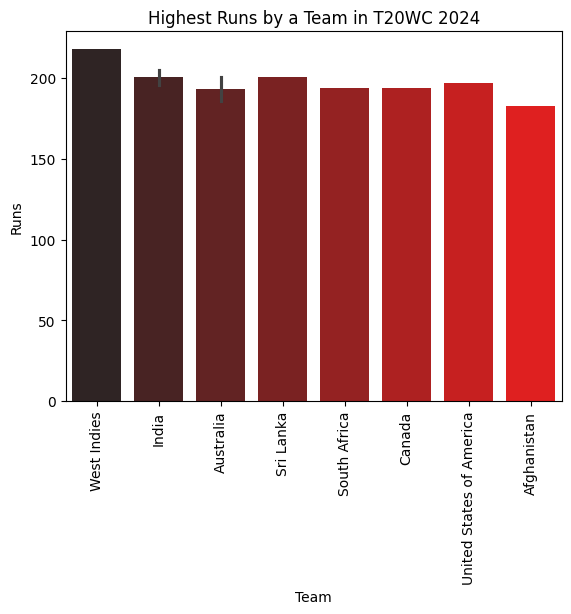

In [78]:
plt.title('Highest Runs by a Team in T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Runs')
plt.xlabel('Team')
sns.barplot(x = highest_total_by_team['batting_team'].head(10), y = highest_total_by_team['total_runs'].head(10), hue = highest_total_by_team['batting_team'].head(10), palette='dark:red')
plt.show()

**OBSERVATIONS**
- **West Indies** scored a total of 218 runs in T20WC which is highest.
- **India** is on second rank with 196 and 205 runs.
- **Australia** is on third spot with 201 and 186 runs.
---

## 
<center><h2 id = 'sec3.5'>Other Analysis and Stats</h2></center>

### 
<center><h3 id = 'sec3.5.1'>1. Total Number of Sixes and Fours in T20WC 2024</h3></center>

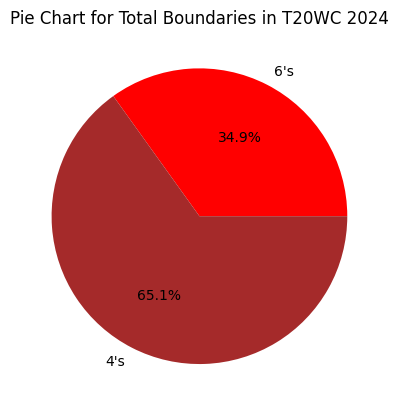

In [79]:
sixes = int(len(sixes_df))
fours = int(len(fours_df))
plt.title('Pie Chart for Total Boundaries in T20WC 2024')
plt.pie(x = [sixes, fours] , labels=["6's", "4's"], colors=['Red', 'Brown'], autopct='%.1f%%')
plt.show()

**OBSERVATIONS**
- Total **Boundaries** - 1487
- Total Number of **Sixes** - 519
- Total Number of **fours** - 968
---

<center><h3 id = 'sec3.5.2'>2. Types of Wicket in T20WC 2024</h3></center>

In [80]:
wicket_types = df.groupby('wicket_type')['match_id'].count().sort_values(ascending=False).reset_index()
wicket_types

,wicket_type,match_id
0,caught,401
1,bowled,131
2,lbw,72
3,run out,39
4,caught and bowled,23
5,stumped,15
6,retired hurt,2
7,retired out,1


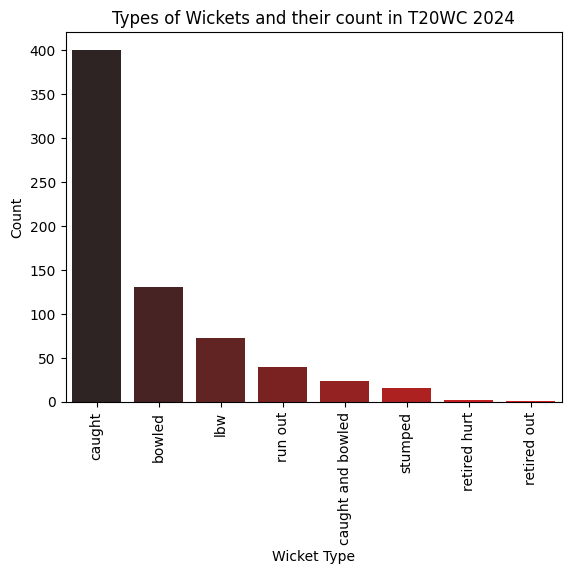

In [81]:
plt.title('Types of Wickets and their count in T20WC 2024')
plt.xticks(rotation= 90)
plt.ylabel('Count')
plt.xlabel('Wicket Type')
sns.barplot(x = wicket_types['wicket_type'].head(10), y = wicket_types['match_id'].head(10), hue = wicket_types['wicket_type'].head(10), palette='dark:red')
plt.show()

**OBSERVATIONS**
- Total Number of Wickets by **Catch** - 401
- Total Number of Wickets by **Bowled** - 131
- Total Number of Wickets by **LBW** - 72
- Total Number of Wickets by **Runout** - 39
- Total Number of Wickets by **Caught and Bowled** - 23
- Total Number of Wickets by **Stumped** - 15
- Total Number of Wickets by **Retired Hurt** - 2
- Total Number of Wickets by **Retired Out** - 1
---